In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [2]:
! ls

__pycache__                   for_watson.png
april_tag_pose.py             images
building_2.jpg                question3.py
calibration_matrix.npy        rp_hw1_code.ipynb
camera_calibration.py         utils.py
capture_calibration_images.py vanish_2.jpeg
distortion_coefficients.npy


In [3]:
img = cv2.imread("for_watson.png")

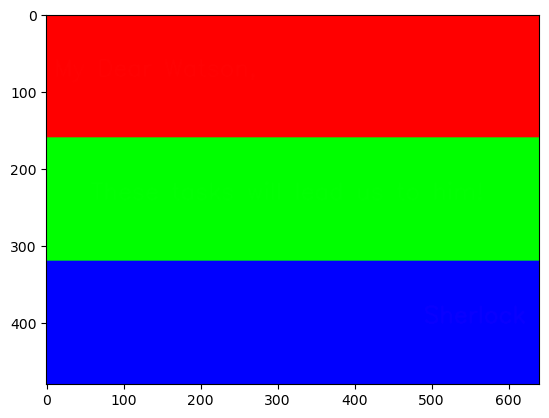

In [4]:
plt.imshow(img)

In [8]:
img.shape

(480, 640, 3)

In [9]:
img.shape[0]/3

160.0

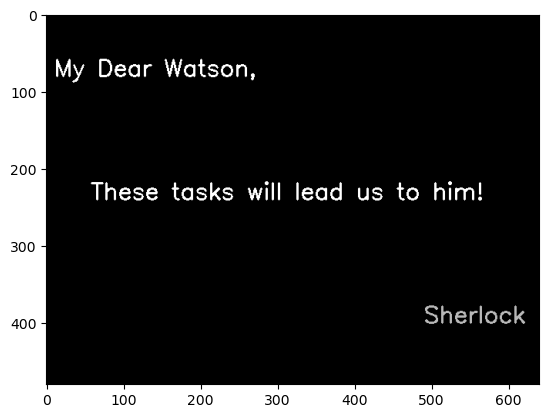

In [26]:
r_img = img[0:160,:]
g_img = img[160:320,:]
b_img = img[320:,]

r_img_a = r_img[:,:,2] * 200
g_img_a = g_img[:,:,0] * 200
b_img_a = b_img[:,:,0] * 205

full_img = np.zeros((480,640))

full_img[0:160,:] = r_img_a
full_img[160:320,:] = g_img_a
full_img[320:,] = b_img_a

plt.imshow(full_img,cmap="gray")


In [13]:
cv2.imwrite('decoded_watson_img.png',full_img)

True

In [27]:
full_img.shape

(480, 640)

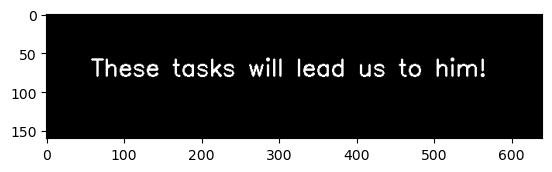

In [34]:
plt.imshow(g_img_a,cmap="gray")

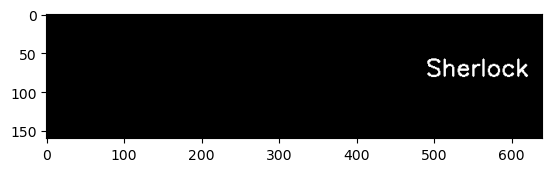

In [35]:
plt.imshow(b_img_a,cmap="gray")

In [5]:
cv2.imshow("image", img)
cv2.waitKey(0)
cv2.destoyAllWindows()

AttributeError: module 'cv2' has no attribute 'destoyAllWindows'

In [21]:
decoded = cv2.imdecode(np.fromstring(img, dtype=np.uint8), cv2.IMREAD_UNCHANGED)


/var/folders/by/6j8c_cpj5txdp9plqfhyvs5m0000gn/T/ipykernel_3544/3536401994.py:1: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  decoded = cv2.imdecode(np.fromstring(img, dtype=np.uint8), cv2.IMREAD_UNCHANGED)


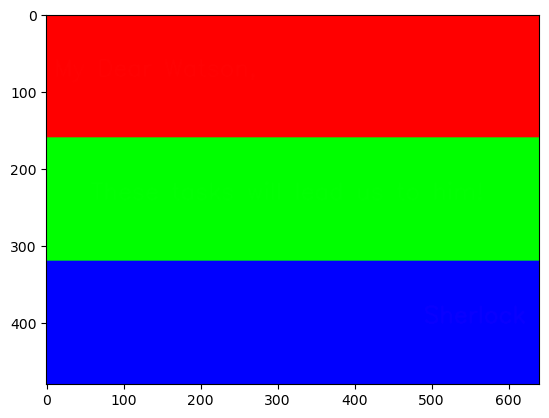

In [24]:
plt.imshow(img)

In [13]:
decoded_img = cv2.imdecode(img)
plt.imshow(decoded_img)

error: OpenCV(4.5.5) :-1: error: (-5:Bad argument) in function 'imdecode'
> Overload resolution failed:
>  - imdecode() missing required argument 'flags' (pos 2)
>  - imdecode() missing required argument 'flags' (pos 2)


In [2]:
import cv2


def char_generator(message):
    for c in message:
        yield ord(c)

def get_image(image_location):
    img = cv2.imread(image_location)
    return img

def gcd(x, y):
    while(y):
        x, y = y, x % y

    return x

def encode_image(image_location, msg):
    img = get_image(image_location)
    msg_gen = char_generator(msg)
    pattern = gcd(len(img), len(img[0]))
    for i in range(len(img)):
        for j in range(len(img[0])):
            if (i+1 * j+1) % pattern == 0:
                try:
                    img[i-1][j-1][0] = next(msg_gen)
                except StopIteration:
                    img[i-1][j-1][0] = 0
                    return img

def decode_image(img):
    #img = get_image(img_loc)
    pattern = gcd(len(img), len(img[0]))
    message = ''
    for i in range(len(img)):
        for j in range(len(img[0])):
            if (i-1 * j-1) % pattern == 0:
                if img[i-1][j-1][0] != 0:
                    message = message + chr(img[i-1][j-1][0])
                else:
                    return message

In [5]:
decode_image(img)

''

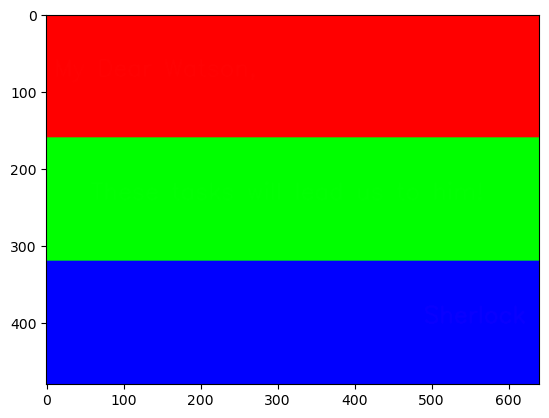

In [15]:
plt.imshow(img)

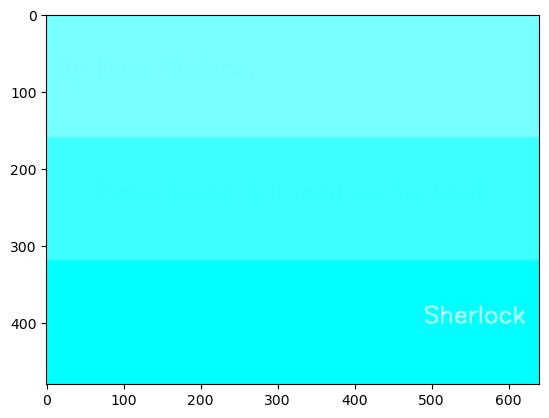

In [14]:
decoded = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
plt.imshow(decoded)

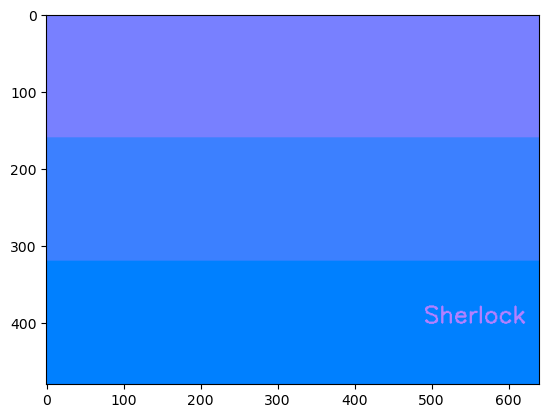

In [21]:
decoded = cv2.cvtColor(img, cv2.COLOR_BGR2HLS)
plt.imshow(decoded)

In [25]:
!ls

for_watson.png    rp_hw1_code.ipynb vanish_2.jpeg


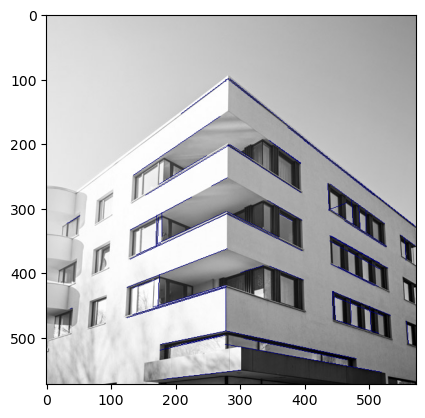

In [44]:
import cv2
import numpy as np

img = cv2.imread('building_2.jpg')

gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
edges = cv2.Canny(gray, 500, 460)
lines = cv2.HoughLinesP(edges, 1.2, np.pi/180, 50, maxLineGap=20)
for line in lines:
    x1, y1, x2, y2 = line[0]
    cv2.line(img, (x1, y1), (x2, y2), (0, 0, 128), 1)

# cv2.imwrite('linesDetected.jpg', img)
plt.imshow(img)

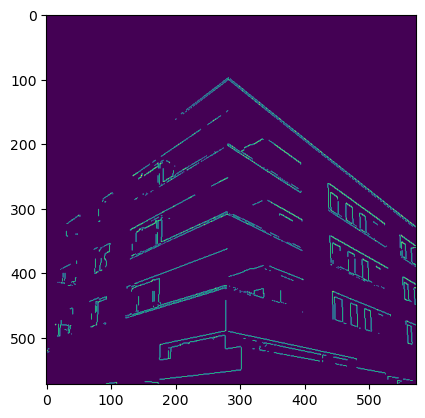

In [45]:
plt.imshow(edges)

In [42]:
print(lines[0])

TypeError: 'NoneType' object is not subscriptable

In [51]:

img = cv2.imread('building_2.jpg')

gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
edges = cv2.Canny(gray, 500, 460)
# lines = cv2.HoughLinesP(edges, 1.2, np.pi/180, 50, maxLineGap=20)

lines = cv2.HoughLines(img, 1, np.pi / 180, 150, None, 0, 0)
    
if lines is not None:
    for i in range(0, len(lines)):
        rho = lines[i][0][0]
        theta = lines[i][0][1]
        a = math.cos(theta)
        b = math.sin(theta)
        x0 = a * rho
        y0 = b * rho
        pt1 = (int(x0 + 1000*(-b)), int(y0 + 1000*(a)))
        pt2 = (int(x0 - 1000*(-b)), int(y0 - 1000*(a)))
        cv2.line(cdst, pt1, pt2, (0,0,255), 3, cv.LINE_AA)
    
plt.imshow(cdst)

error: OpenCV(4.5.5) /private/var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_11bywz31rl/croots/recipe/opencv-suite_1659973604098/work/modules/imgproc/src/hough.cpp:120: error: (-215:Assertion failed) img.type() == CV_8UC1 in function 'HoughLinesStandard'


In [52]:
import cv2
import cv2.aruco as aruco
import numpy as np
import os

In [55]:
import cv2
import cv2.aruco as aruco
import numpy as np
import os

def findArucoMarkers(img, markerSize = 6, totalMarkers=250, draw=True):
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    key = getattr(aruco, f'DICT_{markerSize}X{markerSize}_{totalMarkers}')
    arucoDict = aruco.Dictionary_get(key)
    arucoParam = aruco.DetectorParameters_create()
    bboxs, ids, rejected = aruco.detectMarkers(gray, arucoDict, parameters = arucoParam)
    print(ids)

cap = cv2.VideoCapture(0)
while True:
    success, img = cap.read()
    findArucoMarkers(img)
    cv2.imshow('img',img)
    k = cv2.waitKey(30) & 0xff
    if k == 27:
        break
cap.release()
cv2.destroyAllWindows()

[ WARN:0@3797.532] global /private/var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_11bywz31rl/croots/recipe/opencv-suite_1659973604098/work/modules/videoio/src/cap_gstreamer.cpp (862) isPipelinePlaying OpenCV | GStreamer warning: GStreamer: pipeline have not been created


None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
